In [14]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel

In [7]:
# Load datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
# seeing the null values
train_data.isnull().sum()

,0
address,7002
career_objective,3841
skills,43
educational_institution_name,61
degree_names,61
passing_years,61
educational_results,61
result_types,61
major_field_of_studies,61
professional_company_names,67


In [8]:
# Extract test IDs
test_ids = test_data['ID']

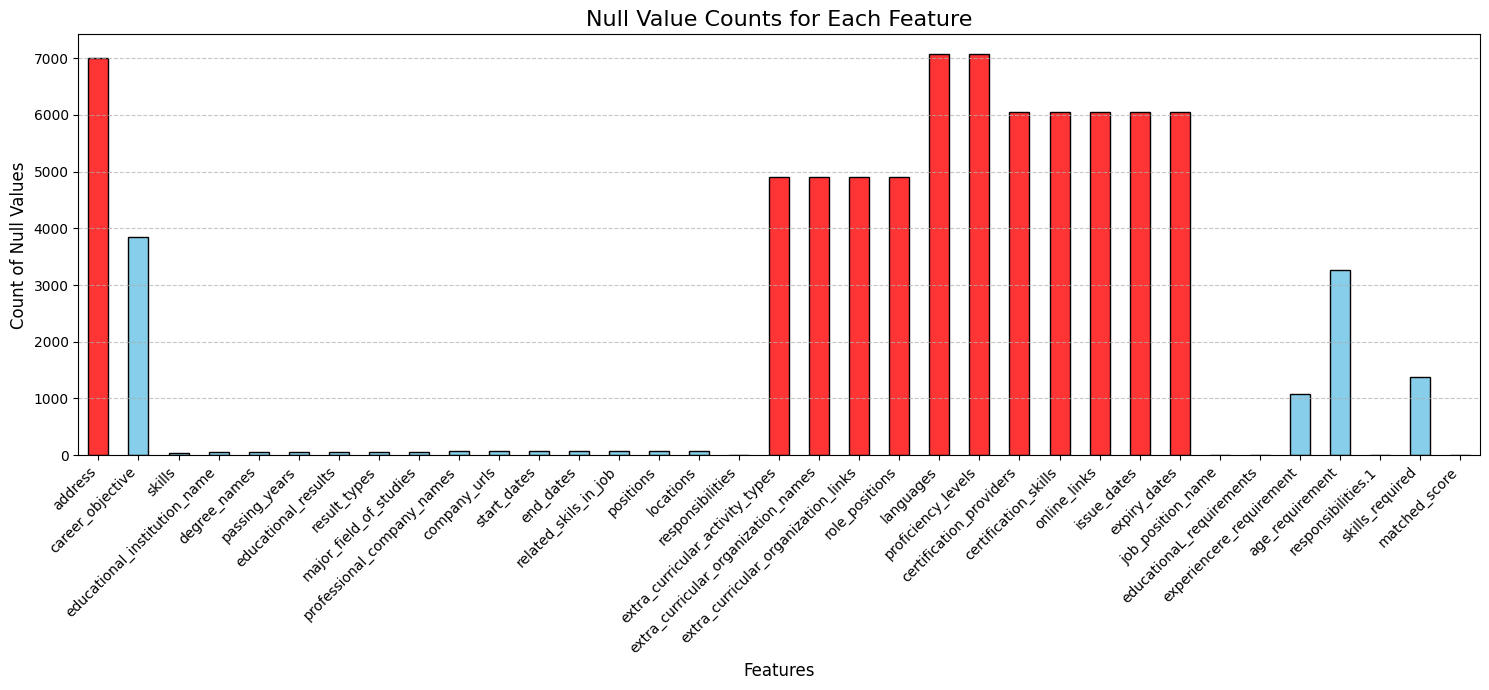

In [23]:
null_counts = train_data.isnull().sum()
# Determine bar colors based on the condition
colors = np.where(null_counts > 4500, '#FF3434', 'skyblue')

# Plotting the bar chart
plt.figure(figsize=(15, 7))  # Adjusted figure size
null_counts.plot(kind='bar', color=colors, edgecolor='black')

# Titles and labels with proper font sizes
plt.title('Null Value Counts for Each Feature', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Null Values', fontsize=12)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha='right')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout fits into the canvas
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
# Handle missing values
train_data.fillna('missing', inplace=True)
test_data.fillna('missing', inplace=True)

In [ ]:
# show all the columns
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,company_urls,start_dates,end_dates,related_skils_in_job,positions,locations,responsibilities,extra_curricular_activity_types,extra_curricular_organization_names,extra_curricular_organization_links,role_positions,languages,proficiency_levels,certification_providers,certification_skills,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
0,missing,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],[None],['Nov 2019'],['Till Date'],[['Big Data']],['Big Data Analyst'],['N/A'],Technical Support\nTroubleshooting\nCollaborat...,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,Senior Software Engineer,B.Sc in Computer Science & Engineering from a ...,At least 1 year,missing,Technical Support\nTroubleshooting\nCollaborat...,missing,0.850000
1,missing,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],['N/A'],['Sep 2019'],['Till Date'],"[['Data Analysis', 'Business Analysis', 'Machi...",['Business Analyst'],['N/A'],Machine Learning Leadership\nCross-Functional ...,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,Machine Learning (ML) Engineer,M.Sc in Computer Science & Engineering or in a...,At least 5 year(s),missing,Machine Learning Leadership\nCross-Functional ...,missing,0.750000
2,missing,missing,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],['N/A'],['June 2018'],['Till Date'],"[['Unified Payment Interface', 'Risk Predictio...",['Software Developer (Machine Learning Enginee...,['N/A'],"Trade Marketing Executive\nBrand Visibility, S...",missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,"Executive/ Senior Executive- Trade Marketing, ...",Master of Business Administration (MBA),At least 3 years,missing,"Trade Marketing Executive\nBrand Visibility, S...",Brand Promotion\nCampaign Management\nField Su...,0.416667
3,missing,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...","[None, None, None, None, None, None]","['January 2011', 'January 2008', 'January 2006...","['November 2015', 'January 2010', 'January 200...","[['accounts receivables', 'banking', 'G/L Acco...","['Accountant', 'Accounts Receivable Clerk', 'M...","['City, State', 'City, State', 'City, State', ...",Apparel Sourcing\nQuality Garment Sourcing\nRe...,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,Business Development Executive,Bachelor/Honors,1 to 3 years,Age 22 to 30 years,Apparel Sourcing\nQuality Garment Sourcing\nRe...,Fast typing skill\nIELTSInternet browsing & on...,0.760000
4,missing,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...","[None, None, None, None, None]","['January 2016', 'January 2016', 'January 201

In [ ]:
# print the column names
print(train_data.columns)

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', '﻿job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score'],
      dtype='object')


In [ ]:
# dropping the address, passing_years,company_urls,extra_curricular_organization_links,online_links, issue_dates
train_data.drop(columns=['address', 'passing_years', 'company_urls', 'extra_curricular_organization_links', 'online_links', 'issue_dates','start_dates', 'end_dates','result_types','passing_years','locations','extra_curricular_activity_types', 'role_positions', 'certification_providers',], inplace=True)
test_data.drop(columns=['address', 'passing_years', 'company_urls', 'extra_curricular_organization_links', 'online_links', 'issue_dates','start_dates', 'end_dates','result_types','passing_years','locations','extra_curricular_activity_types', 'role_positions', 'certification_providers'], inplace=True)

In [ ]:
# Separate features and target
X = train_data.drop(columns=['matched_score'])
y = train_data['matched_score']
combined_data = pd.concat([X, test_data.drop(columns=['ID'])], axis=0)

In [ ]:
# TF-IDF Vectorization for text columns
text_columns = [
    'skills', 'career_objective', 'educational_institution_name',
    'related_skils_in_job', 'responsibilities', 'skills_required',
    'degree_names', 'major_field_of_studies',
    'professional_company_names', 'positions',
     'extra_curricular_organization_names',
    '﻿job_position_name','proficiency_levels',
     'languages','certification_skills'
]
for text_col in text_columns:
    tfidf = TfidfVectorizer(max_features=500, stop_words='english', ngram_range=(1, 2))
    tfidf_matrix = tfidf.fit_transform(combined_data[text_col].fillna('missing')).toarray()
    tfidf_df = pd.DataFrame(tfidf_matrix, columns=[f'{text_col}_{i}' for i in range(tfidf_matrix.shape[1])])
    combined_data = pd.concat([combined_data.reset_index(drop=True), tfidf_df], axis=1)
    combined_data.drop(columns=[text_col], inplace=True)


In [ ]:
# Encode categorical features
label_encoders = {}
for col in combined_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col])
    label_encoders[col] = le

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

In [ ]:
# Split back into training and testing sets
X = combined_data.iloc[:len(X), :]
test_data_processed = combined_data.iloc[len(X):, :]

In [ ]:
# Feature selection using LightGBM
lgb_temp = lgb.LGBMRegressor(random_state=42, n_estimators=100)
lgb_temp.fit(X, y)
selector = SelectFromModel(lgb_temp, prefit=True, threshold='median')
X_selected = selector.transform(X)
test_data_selected = selector.transform(test_data_processed)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.375533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35384
[LightGBM] [Info] Number of data points in the train set: 7635, number of used features: 5613
[LightGBM] [Info] Start training from score 0.660667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `s

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_predictions = np.zeros(len(y))
test_predictions = np.zeros(test_data_selected.shape[0])

In [ ]:
for train_index, valid_index in kf.split(X_selected):
    X_train, X_valid = X_selected[train_index], X_selected[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    # Train LightGBM model
    lgb_model = lgb.LGBMRegressor(
        random_state=42, learning_rate=0.02, n_estimators=1000, num_leaves=60,
        max_depth=-1, min_child_samples=25, subsample=0.75, colsample_bytree=0.75,
        reg_alpha=0.3, reg_lambda=0.3
    )
    lgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)],
                 eval_metric='rmse',
                 callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=0)])

    # Validate the model
    oof_predictions[valid_index] = lgb_model.predict(X_valid)
    test_predictions += lgb_model.predict(test_data_selected) / kf.n_splits

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.182665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29177
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 3548
[LightGBM] [Info] Start training from score 0.658422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29163
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 3543
[LightGBM] [Info] Start training from score 0.661442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29152
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 3543
[LightGBM] [Info] Start training from score 0.661377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.167171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29156
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 3541
[LightGBM] [Info] Start training from score 0.661045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.166496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29177
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 3547
[LightGBM] [Info] Start training from score 0.661050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Evaluate performance
mse = mean_squared_error(y, oof_predictions)
r2 = r2_score(y, oof_predictions)
print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R2 Score: {r2}")

Validation Mean Squared Error: 0.008303184115104894
Validation R2 Score: 0.7036766244530777


In [ ]:
submission = pd.DataFrame({'ID': test_ids, 'matched_score': test_predictions})
submission.to_csv('submission.csv', index=False)